In [7]:
import pandas as pd
import matplotlib.pyplot as plt

## Data from Xavier's Laptop

In [8]:
bag1_path = '/home/xavier/projects/datasets/bag_1.csv'

data1 = pd.read_csv(bag1_path)['0.002884156']
data1.info()
data1.mean()

<class 'pandas.core.series.Series'>
RangeIndex: 2682 entries, 0 to 2681
Series name: 0.002884156
Non-Null Count  Dtype  
--------------  -----  
2682 non-null   float64
dtypes: float64(1)
memory usage: 21.1 KB


0.002852460068605518

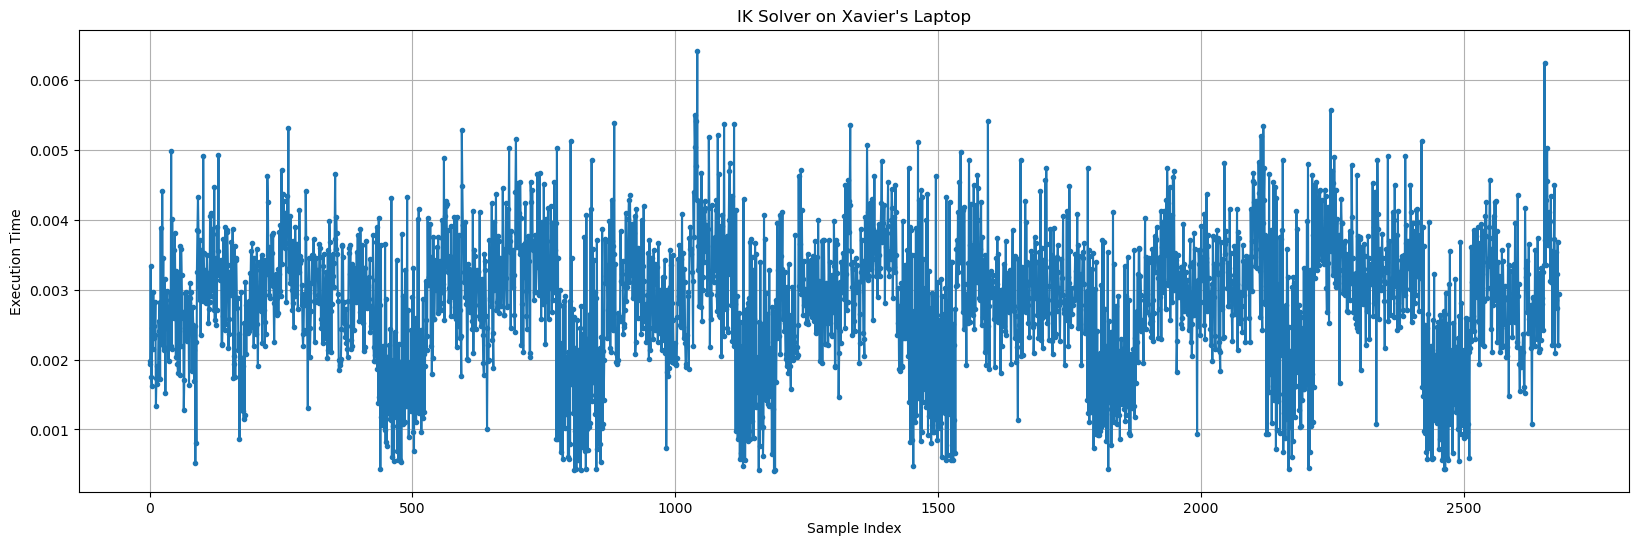

In [9]:
plt.figure(figsize=(20, 6))
data1.plot(kind='line', marker='.', title='IK Solver on Xavier\'s Laptop')

plt.xlabel('Sample Index')
plt.ylabel('Execution Time')
plt.grid(True)

plt.show()

## Data from Ross

In [10]:
bag2_path = '/home/xavier/projects/datasets/bag_2.csv'

data2 = pd.read_csv(bag2_path)['0.008640959']
data2.info()
data2.mean()

<class 'pandas.core.series.Series'>
RangeIndex: 2680 entries, 0 to 2679
Series name: 0.008640959
Non-Null Count  Dtype  
--------------  -----  
2680 non-null   float64
dtypes: float64(1)
memory usage: 21.1 KB


0.013068378926119402

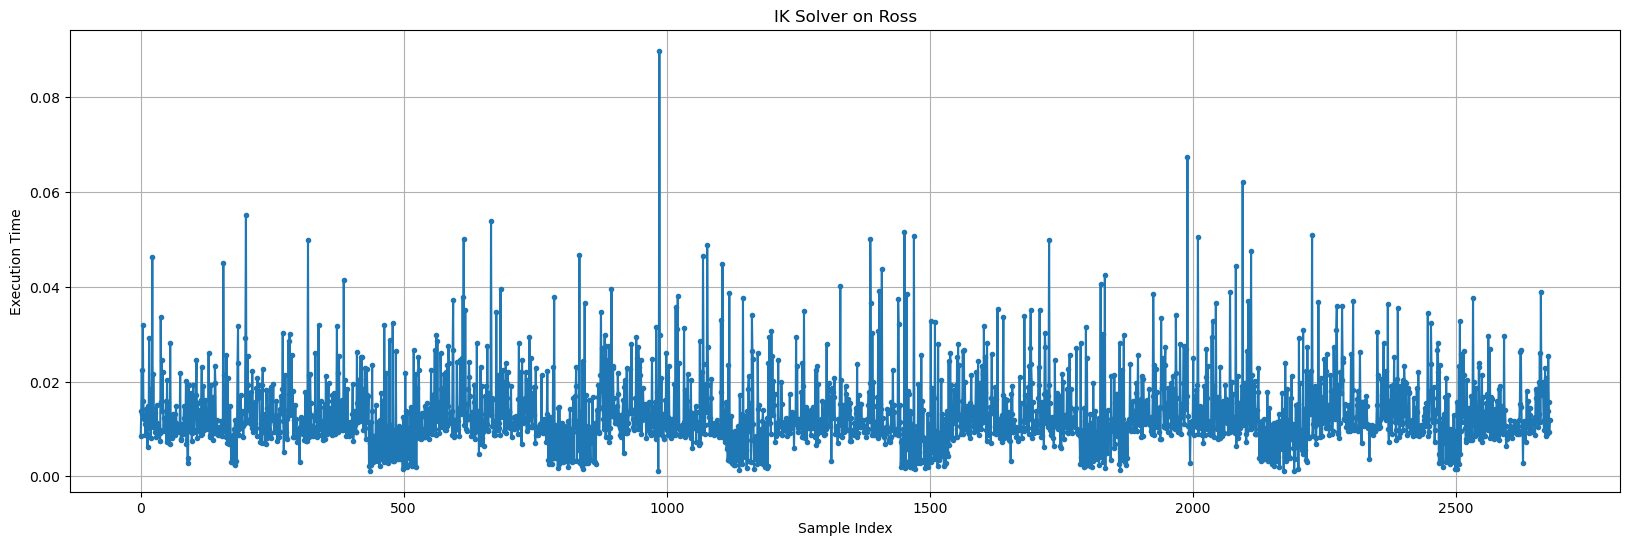

In [11]:
plt.figure(figsize=(20, 6))
data2.plot(kind='line', marker='.', title='IK Solver on Ross')

plt.xlabel('Sample Index')
plt.ylabel('Execution Time')
plt.grid(True)

plt.show()